# Stock Price Evaluation

The dataset used is from Kaggle. It has many variables and a target variable has been identified as Adjusted Closing Price of the stock. The dataset has enough input variables with traits to predict the target variable. The input variables include date, high, low, close and adjested prices. Some of the features will be engineered so as to have a more robust dataset.

One of the major challenges of investors and brokers is predicting the stock price within a period considering the dynamism, level of uncertianty and price volitity of stocks in economic down turn. 

We expect to come up with a model that can assist investors and brokers in predicting stock pricess and thereby make good investment decisions.

## Project Planning
STEP 1 Domain is Finance - Stocks

Brainstorm: Stock Price / Stock Performance / Stock Growth

Stock Price - Investors and stok brokers will benefit most as the model will guide their decisions regarding profitable stocks

STEP 2 Predict stock price based on transaction characteristics

Determine the dividend based on given stock transaction traits

Predict stock growth based on transaction characteristics

STEP 3 Dataset from kaggle - Stock_Price Evaluation

STEP 4 Selected Topic is Predict stock price based on transaction characteristics

The machine learning task needed is Regression

The target variable is Adj. Close ie adjusted closing stock price

The feature variables are interesting and can address the topic

STEP 5 The Win Condition is to build the best possible regression model in a week

# Library Imports

In [225]:
#Import Libraries for data analysis and ploting of graphs
import numpy as np

import pandas as pd
pd.set_option('display.max_column',100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

#Import sklearn libraries for machine learning
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore',category=ConvergenceWarning)

#Import Pickle library for saving winning pipepline object object to disk
import pickle

# Exploratory Analysis

In [138]:
#Import Dataset & Display the first 5 rows
df=pd.read_csv('Stock_Price.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,19/08/2004,100.01,104.06,95.96,100.335,44659000,0.0,1,50.159839,52.191109,48.128568,50.322842,44659000
1,20/08/2004,101.01,109.08,100.50,108.310,22834300,0.0,1,50.661387,54.708881,50.405597,54.322689,22834300
2,23/08/2004,110.76,113.48,109.05,109.400,18256100,0.0,1,55.551482,56.915693,54.693835,54.869377,18256100
3,24/08/2004,111.24,111.60,103.57,104.870,15247300,0.0,1,55.792225,55.972783,51.945350,52.597363,15247300
4,25/08/2004,104.76,108.00,103.88,106.000,9188600,0.0,1,52.542193,54.167209,52.100830,53.164113,9188600


In [139]:
#Display the last 5 rows
df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
3120,10/01/2017,827.07,829.41,823.1400,826.01,1141799,0.0,1,827.07,829.41,823.1400,826.01,1141799
3121,11/01/2017,826.62,829.90,821.4700,829.86,1261666,0.0,1,826.62,829.90,821.4700,829.86,1261666
3122,12/01/2017,828.38,830.38,821.0100,829.53,1348274,0.0,1,828.38,830.38,821.0100,829.53,1348274
3123,13/01/2017,831.00,834.65,829.5200,830.94,1255255,0.0,1,831.00,834.65,829.5200,830.94,1255255
3124,17/01/2017,830.00,830.18,823.2001,827.20,1242810,0.0,1,830.00,830.18,823.2001,827.20,1242810


In [140]:
#Verify the data types that are object
df.dtypes[df.dtypes=='object']

Date    object
dtype: object

In [141]:
#Display the summary statistical values
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03,3125.000000,3125.0,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03
mean,560.171567,565.480031,554.309518,559.907342,8.404691e+06,0.181751,1.0,354.861790,358.112859,351.231911,354.691981,8.404691e+06
std,200.944961,201.563829,199.979903,200.813213,8.399679e+06,10.160186,0.0,195.252794,196.367956,193.820339,195.144724,8.399679e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,445.250000,450.720000,438.560500,444.080000,3.209500e+06,0.000000,1.0,223.314350,226.057819,219.959243,222.727539,3.209500e+06
50%,548.490000,553.520000,543.670000,548.650000,5.620700e+06,0.000000,1.0,288.992091,291.399522,286.760201,289.578902,5.620700e+06
75%,667.490000,673.027500,659.240000,667.120000,1.107890e+07,0.000000,1.0,517.492450,520.810000,513.108918,517.372078,1.107890e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,838.500000,839.000000,829.520000,835.740000,8.215110e+07


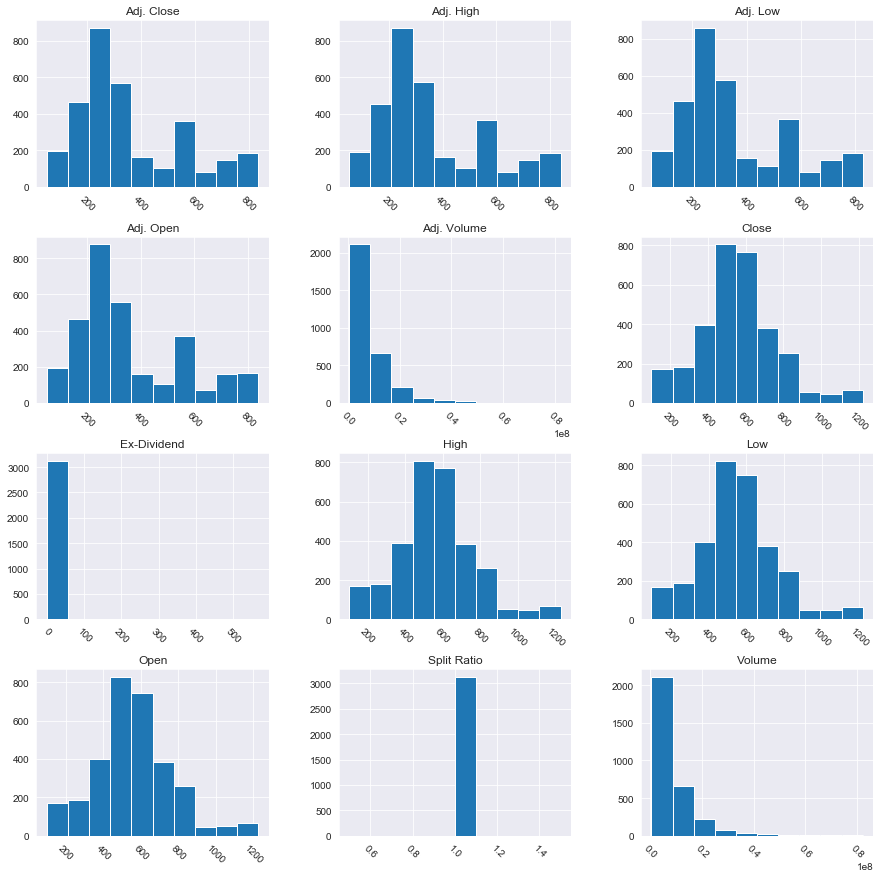

In [142]:
#Represent the data distribution in bar chart
df.hist(figsize=(15,15), xrot=-45)
plt.show()

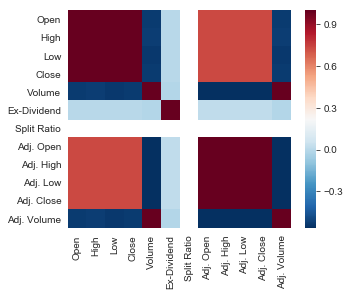

In [143]:
#Plot the heat map to show how the variables are correltaed
#Most of the variables shows strong correlation
correlations=df.corr()
sns.set_style('white')
plt.figure(figsize=(5,4))
sns.heatmap(correlations,cmap='RdBu_r')
plt.show()

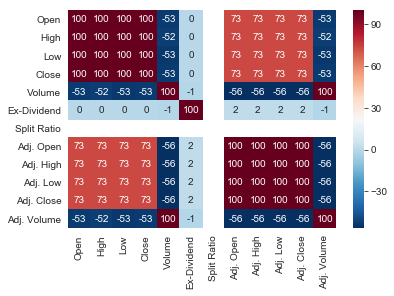

In [144]:
#Heat map with correlation coefficients
sns.heatmap(correlations*100,
           cmap='RdBu_r',
           annot=True,
           fmt='.0f')
plt.show()

In [145]:
df[['Open','Adj. Open']].corr()

,Open,Adj. Open
Open,1.000000,0.733222
Adj. Open,0.733222,1.000000


In [146]:
#Heat map showing in mask - 0 for lower mask and 1 for upper mask
mask=np.zeros_like(correlations)
mask[np.triu_indices_from(mask)]=1

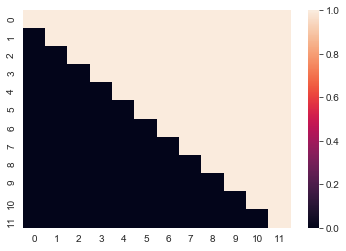

In [147]:
sns.heatmap(mask)
plt.show()

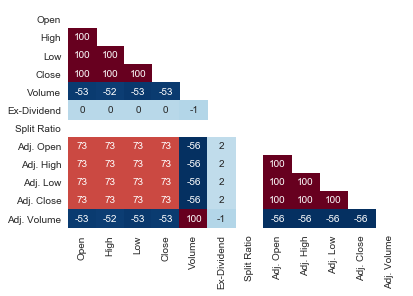

In [148]:
#Heat map with only lower(0) mask and Remove the color bar
sns.heatmap(correlations*100,
           cmap='RdBu_r',
           annot=True,
           fmt='.0f',
           mask=mask,
           cbar=False)
plt.show()

# Data Cleaning

In [149]:
#Remove all repetition in the dataset
df=df.drop_duplicates()

In [150]:
#Replace all object data types that are empty with "Missing"
for column in df.select_dtypes(include=['object']):
    df[column].fillna('Missing',inplace=True)

In [151]:
#Display the number of object data type with corresponding number of empty cells
df.select_dtypes(include=['object']).isnull().sum()

Date    0
dtype: int64

In [154]:
#Display the number of integer data type with corresponding number of empty cells
df.select_dtypes(exclude=['object']).isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

# Feature Engineering

In [155]:
#split the date variable into 3 new variables, day, month & year
new_stock_price=df['Date'].str.split('/',n=2, expand=True)
df['Day']=new_stock_price[0]
df['Month']=new_stock_price[1]
df['Year']=new_stock_price[2]
new_stock_price

,0,1,2
0,19,08,2004
1,20,08,2004
2,23,08,2004
3,24,08,2004
4,25,08,2004
5,26,08,2004
6,27,08,2004
7,30,08,2004
8,31,08,2004
9,01,09,2004


In [156]:
#Display the engineered dataframe
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Day,Month,Year
0,19/08/2004,100.010,104.0600,95.9600,100.335,44659000,0.0,1,50.159839,52.191109,48.128568,50.322842,44659000,19,08,2004
1,20/08/2004,101.010,109.0800,100.5000,108.310,22834300,0.0,1,50.661387,54.708881,50.405597,54.322689,22834300,20,08,2004
2,23/08/2004,110.760,113.4800,109.0500,109.400,18256100,0.0,1,55.551482,56.915693,54.693835,54.869377,18256100,23,08,2004
3,24/08/2004,111.240,111.6000,103.5700,104.870,15247300,0.0,1,55.792225,55.972783,51.945350,52.597363,15247300,24,08,2004
4,25/08/2004,104.760,108.0000,103.8800,106.000,9188600,0.0,1,52.542193,54.167209,52.100830,53.164113,9188600,25,08,2004
5,26/08/2004,104.950,107.9500,104.6600,107.910,7094800,0.0,1,52.637487,54.142132,52.492038,54.122070,7094800,26,08,2004
6,27/08/2004,108.100,108.6200,105.6900,106.150,6211700,0.0,1,54.217364,54.478169,53.008633,53.239345,6211700,27,08,2004
7,30/08/2004,105.280,105.4900,102.0100,102.010,5196700,0.0,1,52.802998,52.908323,51.162935,51.162935,5196700,30,08,2004
8,31/08/2004,102.320,103.7100,102.1600,102.370,4917800,0.0,1,51.318415,52.015567,51.238167,51.343492,4917800,31,08,2004
9,01/09/2004,102.700,102.9700,99.6700,100.250,9138200,0.0,1,51.509003,51.644421,49.989312,50.280210,9138200,01,09,2004


In [157]:
#Remove redundant column, Date
df.drop(columns=['Date'],inplace=True)

In [158]:
#Display first 5 rows
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Day,Month,Year
0,100.01,104.06,95.96,100.335,44659000,0.0,1,50.159839,52.191109,48.128568,50.322842,44659000,19,08,2004
1,101.01,109.08,100.50,108.310,22834300,0.0,1,50.661387,54.708881,50.405597,54.322689,22834300,20,08,2004
2,110.76,113.48,109.05,109.400,18256100,0.0,1,55.551482,56.915693,54.693835,54.869377,18256100,23,08,2004
3,111.24,111.60,103.57,104.870,15247300,0.0,1,55.792225,55.972783,51.945350,52.597363,15247300,24,08,2004
4,104.76,108.00,103.88,106.000,9188600,0.0,1,52.542193,54.167209,52.100830,53.164113,9188600,25,08,2004


In [159]:
#Verify number of object data type variables
df.dtypes[df.dtypes=='object']

Day      object
Month    object
Year     object
dtype: object

In [160]:
#Verify if there empty cells on the new features
df.select_dtypes(include=['object']).isnull().sum()

Day      0
Month    0
Year     0
dtype: int64

In [161]:
#Display the number of integer data type with corresponding number of empty cells
df.select_dtypes(exclude=['object']).isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [162]:
#Print the unique varibales of Year
print(df.Year.unique())

['2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014' '2015' '2016' '2017']


In [163]:
#Print the unique varibales of Month
print(df.Month.unique())

['08' '09' '10' '11' '12' '01' '02' '03' '04' '05' '06' '07']


In [164]:
#Print the unique varibales of Day
print(df.Day.unique())

['19' '20' '23' '24' '25' '26' '27' '30' '31' '01' '02' '03' '07' '08'
 '09' '10' '13' '14' '15' '16' '17' '21' '22' '28' '29' '04' '05' '06'
 '11' '12' '18']


<function matplotlib.pyplot.show(*args, **kw)>

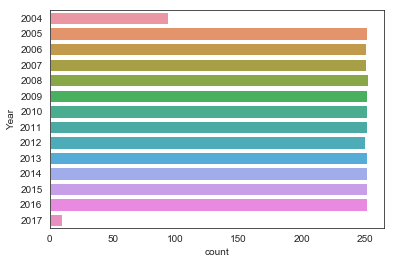

In [165]:
#Display the horzontal bar chart for Year. 
#The 2004 ans 2017 data are incomplete but data will be used as it is
sns.countplot(y='Year',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

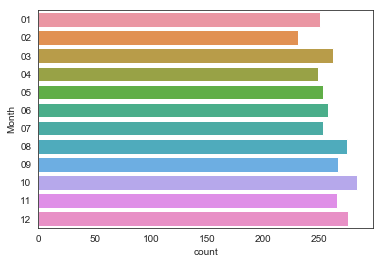

In [166]:
#Display the horzontal bar chart for Month.
#each of the month in a year has got adequate data
sns.countplot(y='Month',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

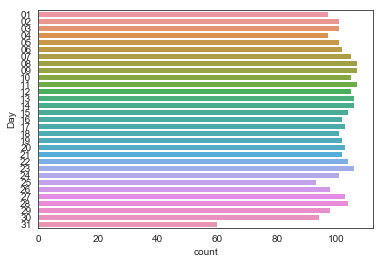

In [167]:
#Display the horzontal bar chart for Day.
#each of the day in a month has got adequate data
sns.countplot(y='Day',data=df)
plt.show

In [168]:
#Replace variable name to eliminate '.' from name
df['Adj_Open']=df['Adj. Open']
df['Adj_High']=df['Adj. High']
df['Adj_Low']=df['Adj. Low']
df['Adj_Close']=df['Adj. Close']
df['Adj_Volume']=df['Adj. Volume']

In [169]:
#Remove reduntant veriables (columns)
df.drop(columns=['Adj. Open','Adj. High', 'Adj. Low','Adj. Close','Adj. Volume'],inplace=True)

In [170]:
#Display updated data frame
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Day,Month,Year,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,100.01,104.06,95.96,100.335,44659000,0.0,1,19,08,2004,50.159839,52.191109,48.128568,50.322842,44659000
1,101.01,109.08,100.50,108.310,22834300,0.0,1,20,08,2004,50.661387,54.708881,50.405597,54.322689,22834300
2,110.76,113.48,109.05,109.400,18256100,0.0,1,23,08,2004,55.551482,56.915693,54.693835,54.869377,18256100
3,111.24,111.60,103.57,104.870,15247300,0.0,1,24,08,2004,55.792225,55.972783,51.945350,52.597363,15247300
4,104.76,108.00,103.88,106.000,9188600,0.0,1,25,08,2004,52.542193,54.167209,52.100830,53.164113,9188600


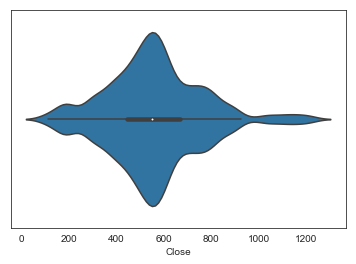

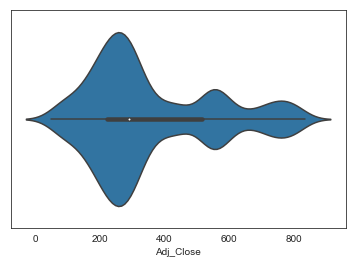

In [171]:
#Check for outliers in the target variable
sns.violinplot(df.Close)
plt.show()

sns.violinplot(df.Adj_Close)
plt.show()

In [172]:
#Save cleaned data set
df.to_csv('cleaned_price_df.csv', index=None)

In [173]:
#Upload cleaned dataset and assign variable
df=pd.read_csv('cleaned_price_df.csv')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Day,Month,Year,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,100.01,104.06,95.96,100.335,44659000,0.0,1,19,8,2004,50.159839,52.191109,48.128568,50.322842,44659000
1,101.01,109.08,100.50,108.310,22834300,0.0,1,20,8,2004,50.661387,54.708881,50.405597,54.322689,22834300
2,110.76,113.48,109.05,109.400,18256100,0.0,1,23,8,2004,55.551482,56.915693,54.693835,54.869377,18256100
3,111.24,111.60,103.57,104.870,15247300,0.0,1,24,8,2004,55.792225,55.972783,51.945350,52.597363,15247300
4,104.76,108.00,103.88,106.000,9188600,0.0,1,25,8,2004,52.542193,54.167209,52.100830,53.164113,9188600


In [174]:
#Group data by Year object type variable and display mean and std for other variables
df.groupby('Year').agg(['mean','std'])

Open                    High                     Low              \
            mean         std        mean         std        mean         std   
Year                                                                           
2004  151.433691   32.940092  154.700106   33.442172  148.952660   32.197738   
2005  277.742155   76.546739  281.025003   77.080506  274.319063   75.744850   
2006  411.886978   42.306923  416.606613   42.264130  406.329814   42.559705   
2007  538.824539   82.987177  544.176702   84.304598  532.995982   80.343027   
2008  466.245731  100.985255  474.341302  100.109620  456.672632  100.987954   
2009  438.961256   89.318015  443.987664   88.140432  434.470133   90.190963   
2010  536.340338   50.496884  540.948138   50.035977  530.787994   50.788169   
2011  569.188986   42.652458  574.365691   42.499921  563.608356   43.024246   
2012  642.786845   52.878978  648.341937   53.535603  636.955120   52.327400   
2013  883.616965   98.518752  890.138577   99.002664  877.712415   98.267432   
2014  715.196885  265.170352  719.918665  266.258327  708.138764  262.640174   
2015  620.065089   87.274362  625.764449   88.270564  613.958103   85.961771   
2016  763.703671   37.710685  769.408662   36.835346  756.963833   38.496463   
2017  820.244000   10.975538  825.251500    8.702191  815.838010   10.542902   

           Close                    Volume               Ex-Dividend  \
            mean         std          mean           std        mean   
Year                                                                   
2004  151.801277   32.612463  1.813560e+07  1.238855e+07    0.000000   
2005  277.761129   76.514454  2.135690e+07  1.142553e+07    0.000000   
2006  411.192122   42.305193  1.696805e+07  1.113329e+07    0.000000   
2007  538.750438   82.635351  1.086710e+07  5.067610e+06    0.000000   
2008  464.852013  100.416241  1.263053e+07  5.980329e+06    0.000000   
2009  439.688958   89.223552  7.011250e+06  3.436921e+06    0.000000   
2010  535.623008   50.460763  6.353398e+06  3.231228e+06    0.000000   
2011  568.974119   42.844047  6.150235e+06  3.134408e+06    0.000000   
2012  642.816483   52.931259  5.203490e+06  2.849017e+06    0.000000   
2013  884.241321   98.729208  4.170577e+06  2.049174e+06    0.000000   
2014  713.965417  264.137307  2.657657e+06  1.598516e+06    2.253856   
2015  619.983591   87.190569  2.169535e+06  1.132223e+06    0.000000   
2016  763.213135   37.402840  1.965741e+06  1.049462e+06    0.000000   
2017  822.429000    9.238678  1.440034e+06  2.933435e+05    0.000000   

                Split Ratio             Day                Month            \
            std        mean  std       mean       std       mean       std   
Year                                                                         
2004   0.000000           1  0.0  16.500000  9.026544  10.276596  1.306759   
2005   0.000000           1  0.0  15.623016  8.766376   6.551587  3.427292   
2006   0.000000           1  0.0  15.800797  8.769958   6.533865  3.421381   
2007   0.000000           1  0.0  15.904382  8.751161   6.545817  3.421241   
2008   0.000000           1  0.0  15.731225  8.791618   6.537549  3.445087   
2009   0.000000           1  0.0  15.722222  8.800253   6.567460  3.436303   
2010   0.000000           1  0.0  15.674603  8.759131   6.583333  3.431312   
2011   0.000000           1  0.0  15.634921  8.777101   6.547619  3.430835   
2012   0.000000           1  0.0  15.776000  8.719976   6.500000  3.425923   
2013   0.000000           1  0.0  15.650794  8.724484   6.543651  3.433210   
2014  35.778852           1  0.0  15.761905  8.764678   6.551587  3.443528   
2015   0.000000           1  0.0  15.750000  8.770934   6.567460  3.436303   
2016   0.000000           1  0.0  15.682540  8.758969   6.555556  3.421413   
2017   0.000000           1  0.0   9.000000  4.472136   1.000000  0.000000   

        Adj_Open               Adj_High                Adj_Low             \
            mean      

In [175]:
#Display the first 5 rows
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Day,Month,Year,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,100.01,104.06,95.96,100.335,44659000,0.0,1,19,8,2004,50.159839,52.191109,48.128568,50.322842,44659000
1,101.01,109.08,100.50,108.310,22834300,0.0,1,20,8,2004,50.661387,54.708881,50.405597,54.322689,22834300
2,110.76,113.48,109.05,109.400,18256100,0.0,1,23,8,2004,55.551482,56.915693,54.693835,54.869377,18256100
3,111.24,111.60,103.57,104.870,15247300,0.0,1,24,8,2004,55.792225,55.972783,51.945350,52.597363,15247300
4,104.76,108.00,103.88,106.000,9188600,0.0,1,25,8,2004,52.542193,54.167209,52.100830,53.164113,9188600


In [176]:
#Creat new columns with proper name syntax
df['Ex_Dividend']=df['Ex-Dividend']
df['Split_Ratio']=df['Split Ratio']

In [177]:
#display first 5 rows to confirm new columns with proper names are add
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Day,Month,Year,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Ex_Dividend,Split_Ratio
0,100.01,104.06,95.96,100.335,44659000,0.0,1,19,8,2004,50.159839,52.191109,48.128568,50.322842,44659000,0.0,1
1,101.01,109.08,100.50,108.310,22834300,0.0,1,20,8,2004,50.661387,54.708881,50.405597,54.322689,22834300,0.0,1
2,110.76,113.48,109.05,109.400,18256100,0.0,1,23,8,2004,55.551482,56.915693,54.693835,54.869377,18256100,0.0,1
3,111.24,111.60,103.57,104.870,15247300,0.0,1,24,8,2004,55.792225,55.972783,51.945350,52.597363,15247300,0.0,1
4,104.76,108.00,103.88,106.000,9188600,0.0,1,25,8,2004,52.542193,54.167209,52.100830,53.164113,9188600,0.0,1


In [178]:
#Remove reduntant columns
df.drop(columns=['Ex-Dividend','Split Ratio'],inplace=True)

In [179]:
#display first 5 rows to confirm redundant columns are removed
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Ex_Dividend,Split_Ratio
0,100.01,104.06,95.96,100.335,44659000,19,8,2004,50.159839,52.191109,48.128568,50.322842,44659000,0.0,1
1,101.01,109.08,100.50,108.310,22834300,20,8,2004,50.661387,54.708881,50.405597,54.322689,22834300,0.0,1
2,110.76,113.48,109.05,109.400,18256100,23,8,2004,55.551482,56.915693,54.693835,54.869377,18256100,0.0,1
3,111.24,111.60,103.57,104.870,15247300,24,8,2004,55.792225,55.972783,51.945350,52.597363,15247300,0.0,1
4,104.76,108.00,103.88,106.000,9188600,25,8,2004,52.542193,54.167209,52.100830,53.164113,9188600,0.0,1


In [180]:
print(df.Split_Ratio.unique())

[1]


In [181]:
print(df.Ex_Dividend.unique())

[  0.        567.9716685]


In [182]:
print(df.Ex_Dividend.max())

567.9716685


In [183]:
#Remove the columns with no significant impact or very low correlation
df.drop(columns=['Ex_Dividend','Split_Ratio'],inplace=True)

In [184]:
#display the updated data frame
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,100.01,104.06,95.96,100.335,44659000,19,8,2004,50.159839,52.191109,48.128568,50.322842,44659000
1,101.01,109.08,100.50,108.310,22834300,20,8,2004,50.661387,54.708881,50.405597,54.322689,22834300
2,110.76,113.48,109.05,109.400,18256100,23,8,2004,55.551482,56.915693,54.693835,54.869377,18256100
3,111.24,111.60,103.57,104.870,15247300,24,8,2004,55.792225,55.972783,51.945350,52.597363,15247300
4,104.76,108.00,103.88,106.000,9188600,25,8,2004,52.542193,54.167209,52.100830,53.164113,9188600


In [185]:
#Engineer new indicator feature Close_Open
df['Close_Open']=(df.Close>=df.Open).astype(int)

In [186]:
#Engineer new vriable feature Total_Sales
df['Total_Sales']=df.Close*df.Adj_Volume

In [187]:
#Display updated dataset
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Close_Open,Total_Sales
0,100.01,104.06,95.96,100.335,44659000,19,8,2004,50.159839,52.191109,48.128568,50.322842,44659000,1,4.480861e+09
1,101.01,109.08,100.50,108.310,22834300,20,8,2004,50.661387,54.708881,50.405597,54.322689,22834300,1,2.473183e+09
2,110.76,113.48,109.05,109.400,18256100,23,8,2004,55.551482,56.915693,54.693835,54.869377,18256100,0,1.997217e+09
3,111.24,111.60,103.57,104.870,15247300,24,8,2004,55.792225,55.972783,51.945350,52.597363,15247300,0,1.598984e+09
4,104.76,108.00,103.88,106.000,9188600,25,8,2004,52.542193,54.167209,52.100830,53.164113,9188600,1,9.739916e+08


In [188]:
#display length or number of rows 
print(len(df))

3125


In [189]:
#confirm if there is any value of Total_Sales less than 0
print(sum(df.Total_Sales<0))

0


In [190]:
#Creat Analytical Base Table / Converts object data type variables to indicators
abt_stkP=pd.get_dummies(df,columns=['Day','Month','Year'])

In [191]:
#display number of columns on the base table
print(len(abt_stkP.columns))

69


In [192]:
#Remove variables used to engineer new features
abt_stkP.drop(['Close','Open','Adj_Volume'],axis=1,inplace=True)

In [193]:
#Display first 5 columns of the base table
abt_stkP.head()

,High,Low,Volume,Adj_Open,Adj_High,Adj_Low,Adj_Close,Close_Open,Total_Sales,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,104.06,95.96,44659000,50.159839,52.191109,48.128568,50.322842,1,4.480861e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,109.08,100.50,22834300,50.661387,54.708881,50.405597,54.322689,1,2.473183e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,113.48,109.05,18256100,55.551482,56.915693,54.693835,54.869377,0,1.997217e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,111.60,103.57,15247300,55.792225,55.972783,51.945350,52.597363,0,1.598984e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,108.00,103.88,9188600,52.542193,54.167209,52.100830,53.164113,1,9.739916e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
#Save the analytical base table
abt_stkP.to_csv('analytical_base_table_stkP.csv', index=None)

# Algorithm Selection
As you can notice, i have imported 5 relevant regression algorithm that will be used for fit the models. the algorithm with the highest R^2 value and lowest MAE values will be selected. These algorithms are: Lasso, Ridge, ElasticNet, Random Forest Regressor and Gradient Boosting Regressor (boosted trees).

Lasso: This is a polynomial regression with more complexity than a linear regression.  They can be tuned to miimize overfitting. Though they may be more difficult to interprete and understand than linear model but they can represnt curvy reltionship. The lasso_alpha (L1) hyperparameter can be tuned to minimize overfitting or maximize underfitting. The hyperparameter lasso_alpha represent the penalty strength. the higher the penalty the more the underfit and the lower the penalty the more the overfit.

Ridge: Ridge regression has more complexity than Lasso. Th model tuning is a bit systematic, automated and empirical. Whereas Lasso relies on L1 penalty, Ridge completely relies on the L2 penalty (squared) instead which shrinks the coefficients but not reduced to zero. you need very high values of L2 to underfit and very low L2 to overfit. 

Elastic-Net: Elastic-Net has more complexity than Ridge.
This algorithm combines L1 & L2 penalties. The L1_ratio (L1/L2) and the strength of the penalties hyperparameters are tuned. The default values of these hyperparameters appear to set all coefficient to zero - this may vary with datasets. The Elastic net can behave like simple linear, lasso or ridge depending on the tuning parameters used.

RandomForestRegressor: This is a type of tree ensembles algorithm. It is refered to as bagging. It combines the most valuable parameters or variales to predict the target feature. The tuning hyperparameters include n_estimators and max_features. n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.. max_features represents the number of features to consider when looking for the best split.

GradientBoostingRegressor: This is also a type of tree ensembles. it is also refered to as boosted tree. It builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Some of the key hyperparameters include n_estimators, max_depth, learning_rate. learning rate shrinks the contribution of each tree by learning_rate.max_depth indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. 

In [226]:
#Upload the Analytical Base Table
df=pd.read_csv('analytical_base_table_stkP.csv')

#Display number of rows and columns
print(df.shape)

(3125, 66)


In [196]:
#Split the data frame into y and x
y=df.Adj_Close
x=df.drop('Adj_Close',axis=1)

In [197]:
#split y and x in train and test data sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

In [198]:
#preprocess the data through cross-validation by assigning pipelines to the models
pipelines={
    'lasso':make_pipeline(StandardScaler(),Lasso(random_state=123)),
    'ridge':make_pipeline(StandardScaler(),Ridge(random_state=123))
}
pipelines['enet']=make_pipeline(StandardScaler(),ElasticNet(random_state=123))

In [199]:
#Assign hyperparameters to the various models
lasso_hyperparameters={
    'lasso__alpha':[0.0001,0.001,0.01,0.1,1,5,10]
}
ridge_hyperparameters={
    'ridge__alpha':[0.0001,0.001,0.01,0.1,1,5,10]
}
enet_hyperparameters={
    'elasticnet__alpha':[0.0001,0.001,0.01,0.1,1,5,10],
    'elasticnet__l1_ratio':[0.1,0.3,0.5,0.7,0.9]
}

In [200]:
#Verify the % split between training set and test set
print('{} observation in the training set.'.format(len(x_train)))
print('{} observation in the test set.'.format(len(x_test)))

2500 observation in the training set.
625 observation in the test set.


In [201]:
#display the values assigned to the various argurment on ridge pipelines
print(pipelines['ridge'])

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001))])


In [202]:
#display the hyperparameters assigned to enet_hyperparameters l1_ratio
print(enet_hyperparameters['elasticnet__l1_ratio'])

[0.1, 0.3, 0.5, 0.7, 0.9]


In [203]:
#Display the mean and std for input High variable
#manual calculation of scaled mean and scaled std
print('Mean:' ,x_train.High.mean())
print('Standard Deviation:' ,x_train.High.std())

Mean: 566.5939783999982
Standard Deviation: 202.8214327497794


In [204]:
(x_train.High.head()-566.5939783999982)/202.821432749779444353308

2078    0.504513
287    -1.232237
516    -0.904263
1847    0.309267
1410    0.003925
Name: High, dtype: float64

In [205]:
(x_test.High.head()-566.5939783999982)/202.8214327497794

2618   -0.285936
2883    1.201826
1086   -1.240963
1928    0.282100
809     0.806798
Name: High, dtype: float64

In [206]:
#Assign standardScaler function as scaler
scaler=StandardScaler()

#fit x_train data set to scale it
scaler.fit(x_train)

#Display of scaled mean and scaled std
print('Mean:' ,scaler.mean_[0])
print('Standard Deviation:' ,scaler.scale_[0])

Mean: 566.5939784
Standard Deviation: 202.78086440598935


C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [207]:
#transform x_test data set to scaled x_test_new
x_test_new=scaler.transform(x_test)

C:\Users\naguk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [208]:
print(type(x_test_new))
print(x_test_new.shape)

<class 'numpy.ndarray'>
(625, 65)


In [209]:
print(x_test_new[:5,0])

[-0.28599335  1.20206619 -1.24121169  0.28215691  0.80695988]


In [210]:
#Create pipelines for Randome Forest and Boosting Tree models
pipelines['rf']=make_pipeline(StandardScaler(),
                            RandomForestRegressor(random_state=123))
pipelines['gb']=make_pipeline(StandardScaler(),
                             GradientBoostingRegressor(random_state=123))

In [211]:
#display the values assigned to the various argurment on 'rf' pipelines
print(pipelines['rf'])

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
  ...rs='warn', n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])


In [212]:
#print the class of the pipelines 'rf'
print (type(pipelines['rf']))

<class 'sklearn.pipeline.Pipeline'>


In [213]:
#print the class for each of the pipelines
for key, value in pipelines.items():
    print(key,type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [214]:
#assign hyperparameters to the rf_hyperparameters
rf_hyperparameters={
    'randomforestregressor__n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200],
    'randomforestregressor__max_features':['auto','sqrt',0.33],
}

In [215]:
#assign hyperparameters to the gb_hyperparameters
gb_hyperparameters={
    'gradientboostingregressor__n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200],
    'gradientboostingregressor__learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'gradientboostingregressor__max_depth':[1, 32]
}

In [216]:
#Creat a dictionary data type for the hyperparameters
hyperparameters={
    'rf':rf_hyperparameters,
    'gb':gb_hyperparameters,
    'lasso':lasso_hyperparameters,
    'ridge':ridge_hyperparameters,
    'enet':enet_hyperparameters
}

In [217]:
#verify each is hyperparameter is listed in the dictionary
for key in ['enet','gb','ridge','rf','lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print(key, 'was found in hyperparameters, and it is a grid.')
        else:
            print(key, 'was found in hyperparameters, and it is not a grid.')
    else:
        print(key, 'was not found in hyperparameters.')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


# Model Training

In [218]:
#fit the various models
fitted_models={}

for name, pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hyperparameters[name],cv=10,n_jobs=-1)
    
    model.fit(x_train, y_train)
    
    fitted_models[name]=model
    
    print(name, 'has been ftted')

C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


lasso has been ftted


C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


ridge has been ftted


C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


enet has been ftted


C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been ftted


C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been ftted


In [219]:
#print the data type for each of the model
for key, value in fitted_models.items():
    print(key,type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [220]:
#verify model fit
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred=model.predict(x_test)
        print(name, 'has been fitted')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

In [221]:
#display best CV scores for each of the models
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.9997273582889373
ridge 0.9998864547081115
enet 0.9998202376642726
rf 0.9997933329083198
gb 0.9996854349462261


In [222]:
#display the R^2(CV) and MAE values for each model
for name, model in fitted_models.items():
    pred=model.predict(x_test)
    print(name)
    print('---------')
    print('R^2:' ,r2_score(y_test,pred))
    print('MAE:' ,mean_absolute_error(y_test,pred))
    print()

lasso
---------
R^2: 0.999726286221792
MAE: 2.2947514396867708

ridge
---------
R^2: 0.9998831103027694
MAE: 1.499684528740198

enet
---------
R^2: 0.999822236839394
MAE: 1.8779255171741984

rf
---------
R^2: 0.9998098912720375
MAE: 1.8353066636880002

gb
---------
R^2: 0.9997382660450502
MAE: 2.103383513947488



C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

C:\Users\naguk\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


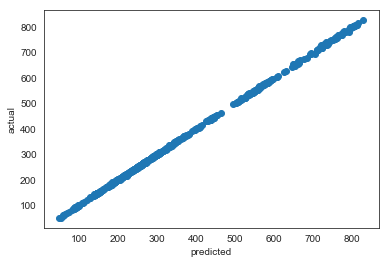

In [223]:
#plot the y_test (actual) and ridge_predicted values
ridge_pred=fitted_models['ridge'].predict(x_test)
plt.scatter(ridge_pred,y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [224]:
#Dump wining Model Into pickel file
with open('finalSTK_model.pkl','wb') as f:
    pickle.dump(fitted_models['ridge'].best_estimator_, f)

# Insights & Analysis

Ridge Model has the highest R^2: 0.9998831103027694
and the lowest MAE: 1.499684528740198. Ridge is the best model for the prediction of Adjusted Closing Prices of stock based on the dataset used.

However, looking at the R^2 values of the other model there is no major significant difference as all the model R^2 value are very close to 1. The mean absolute value of Ridge is much lover than the others,

On the plot of the predicted versus the actual target variables (Adj_Close), all the points seem to fall on a 45 degrees gradient line which indicate a near perfect positive relationship between the actual and the predicted which shows that the model is almost perfect.

Future analysis would require more variables like the price_earning ration, book_value, etc to be more robust. I think the data size is adequate but more input variable would increase the confidence level of the predicted result.